![](../images/logos.jpg "MiCMOR, KIT Campus Alpin")

**[MiCMOR](https://micmor.kit.edu) [SummerSchool "Environmental Data Science: From Data Exploration to Deep Learning"](https://micmor.kit.edu/sites/default/files/MICMoR%20Summer%20School%202019%20Flyer.pdf)**  
IMK-IFU KIT Campus Alpin, Sept. 4 - 13 2019, Garmisch-Partenkirchen, Germany.

---

# Some more xarray analysis

Example from: https://rabernat.github.io/research_computing_2018/intermediate-xarray.html  

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt

>Lets try to reproduce this...
![](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/eln-f-pg.gif)

In [63]:
ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [68]:
# convert to -180/180 
ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
ds = ds.sortby(ds.lon)

Let's select the regions first.

In [69]:
a=ds.sel(lat=slice(-5,5), lon=slice(-170,-120)).mean(dim=['lat','lon'])
ts=(a - a.mean()).sst.rolling(time=3, center=True).mean()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less_equal
  


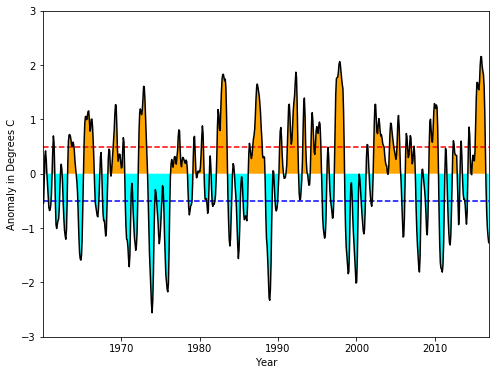

In [70]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
y2=np.zeros_like(ts.values)

ax.hlines(0.5, ts.time.values[0], ts.time.values[-1], color='red', ls='--')
ax.hlines(-0.5, ts.time.values[0], ts.time.values[-1], color='blue', ls='--')
ax.plot(ts.time.values, ts.values, c='black')
ax.fill_between(ts.time.values, ts.values, y2, where=ts.values > 0, facecolor='orange', lw=.5)
ax.fill_between(ts.time.values, ts.values, y2, where=ts.values <=0, facecolor='cyan', lw=.5)
ax.set_xlim(ts.time.values[0], ts.time.values[-1])
ax.set_ylim(-3,3)
ax.set_ylabel('Anomaly in Degrees C')
ax.set_xlabel('Year');

## And another one...

In [ ]:
import pandas as pd
import xarray as xr
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NASA/.GPCP/.V2p1/.multi-satellite/.prcp/dods'
dsp = xr.open_dataset(url, decode_times=False)
true_time = (pd.date_range(start='1960-01-01', periods=len(dsp['T']), freq='MS')
             +pd.Timedelta(days=14))
dsp['T'] = true_time
dsp = dsp.rename({'T': 'time'})
dsp.load()

In [94]:
basin = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NODC/.WOA09/.Masks/.basin/dods')
basin

<xarray.Dataset>
Dimensions:  (X: 360, Y: 180, Z: 33)
Coordinates:
  * X        (X) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * Y        (Y) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * Z        (Z) float32 0.0 10.0 20.0 30.0 50.0 ... 4000.0 4500.0 5000.0 5500.0
Data variables:
    basin    (Z, Y, X) float32 ...
Attributes:
    Conventions:  IRIDL

In [95]:
basin = basin.rename({'X': 'lon', 'Y': 'lat'})
basin

<xarray.Dataset>
Dimensions:  (Z: 33, lat: 180, lon: 360)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * Z        (Z) float32 0.0 10.0 20.0 30.0 50.0 ... 4000.0 4500.0 5000.0 5500.0
Data variables:
    basin    (Z, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL

In [96]:
basin_surf = basin.basin[0]
basin_surf

<xarray.DataArray 'basin' (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [11., 11., 11., ..., 11., 11., 11.],
       [11., 11., 11., ..., 11., 11., 11.],
       [11., 11., 11., ..., 11., 11., 11.]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    Z        float32 0.0
Attributes:
    long_name:  basin code
    units:      ids
    scale_max:  58
    CLIST:      Atlantic Ocean\nPacific Ocean \nIndian Ocean\nMediterranean S...
    valid_min:  1
    valid_max:  58
    scale_min:  1

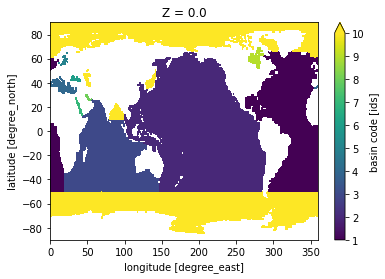

In [97]:
basin_surf.plot(vmax=10)

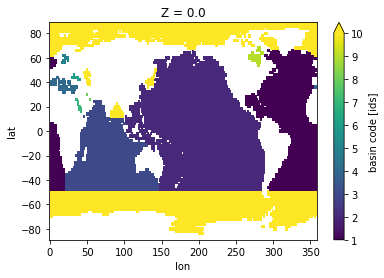

In [98]:
basin_surf_interp = basin_surf.interp_like(ds.sst, method='nearest')
basin_surf_interp.plot(vmax=10)

In [99]:
sst.groupby(basin_surf_interp).first()

<xarray.DataArray 'sst' (time: 684, basin: 14)>
array([[11.886445,  6.808138, 11.252167, ..., 19.353212, 13.417597, 27.382317],
       [12.687719,  7.746781, 11.545435, ..., 18.405867, 13.088696, 27.304405],
       [12.281557,  7.872275, 11.803432, ..., 17.981682, 13.008838, 27.771383],
       ...,
       [ 9.291549,  4.829099,  9.24497 , ..., 24.764828, 17.193325, 29.10545 ],
       [10.128179,  5.794931,  9.977319, ..., 23.361483, 16.137884, 28.663656],
       [11.041203,  6.507085, 11.315964, ..., 21.089323, 14.575122, 28.435175]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
  * basin    (basin) float64 1.0 2.0 3.0 4.0 5.0 ... 10.0 11.0 12.0 53.0 56.0
Attributes:
    pointwidth:          1.0
    valid_min:           -3.0
    valid_max:           45.0
    units:               degree_Celsius
    long_name:           Extended reconstructed sea surface temperature
    standard_name:       sea_surface_temperature
    iridl:has

In [100]:
basin_mean_sst = ds_mm.sst.groupby(basin_surf_interp).mean()
basin_mean_sst

/opt/conda/lib/python3.6/site-packages/xarray/core/groupby.py:639: FutureWarning: Default reduction dimension will be changed to the grouped dimension in a future version of xarray. To silence this warning, pass dim=xarray.ALL_DIMS explicitly.
  skipna=skipna, allow_lazy=True, **kwargs)


<xarray.DataArray 'sst' (basin: 14)>
array([19.33996 , 21.234062, 21.165989, 19.939692,  8.14399 , 15.08432 ,
       28.359253, 26.528849,  0.503296,  1.616356, -0.808461, 12.32178 ,
       14.151541, 28.453861], dtype=float32)
Coordinates:
  * basin    (basin) float64 1.0 2.0 3.0 4.0 5.0 ... 10.0 11.0 12.0 53.0 56.0

In [101]:
df = basin_mean_sst.to_dataframe()
df

,sst
basin,
1.0,19.339960
2.0,21.234062
3.0,21.165989
4.0,19.939692
5.0,8.143990
6.0,15.084320
7.0,28.359253
8.0,26.528849
9.0,0.503296


In [102]:
import pandas as pd
import numpy as np
basin_names = basin_surf.attrs['CLIST'].split('\n')
basin_df = pd.Series(basin_names, index=np.arange(1, len(basin_names)+1))
basin_df

1                 Atlantic Ocean
2                 Pacific Ocean 
3                   Indian Ocean
4              Mediterranean Sea
5                     Baltic Sea
6                      Black Sea
7                        Red Sea
8                   Persian Gulf
9                     Hudson Bay
10                Southern Ocean
11                  Arctic Ocean
12                  Sea of Japan
13                      Kara Sea
14                      Sulu Sea
15                    Baffin Bay
16            East Mediterranean
17            West Mediterranean
18                Sea of Okhotsk
19                     Banda Sea
20                 Caribbean Sea
21                 Andaman Basin
22               North Caribbean
23                Gulf of Mexico
24                  Beaufort Sea
25               South China Sea
26                   Barents Sea
27                   Celebes Sea
28                Aleutian Basin
29                    Fiji Basin
30          North American Basin
31        

In [103]:
df = df.join(basin_df.rename('basin_name'))

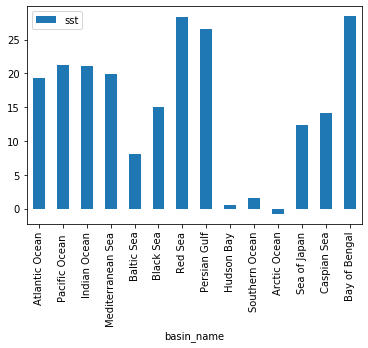

In [104]:
df.plot.bar(x='basin_name')

# Cartopy
https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html

## assignment

![](https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg)

- get the file
- importing xarray, numpy, and matplotlib
- open the file and show content
- print out the long_name attribute of each variable
- Calculate the time-mean of the entire dataset
- From this, make a 2D plot of the the time-mean TOA longwave, shortwave, and solar radiation
(All-Sky conditions) Note the sign conventions on each variable.
- Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux
- Calculate the global mean of TOA net radiation directly from the dataset
- Redo your global mean TOA net radiation calculation with this weight factor: use weight array proportional to cos(λ)
 with a mean value of 1
- Now that you have a weight factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above¶
- calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it
(Xarray's ones_like function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, I know the Earth is not a sphere...it's just a homework problem). Multiplying the pixel area from above with the radiative flux gives you the total amount of radiation absorbed in each pixel
- Calculate and plot the total amount of net radiation in each 1-degree latitude band
- Plot the cumulatuve sum in latitude of that quantity
Label with correct units. (Hint: check out xarray's cumsum function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

You should get a curve tht looks something like this

![](http://www.cgd.ucar.edu/cas/papers/jclim2001a/Fig7.gif)

- Plot the time-mean cloud area fraction (day and night)
- Define boolean masks for low cloud area (≤ 25%) and high cloud area (≥ 75%). Use the whole dataset, not the time mean.
- Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions
Your results should be 2D maps. Xarray's where function will be helpful.
- Using the weight factor from 3.2, calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions
What is the overall effect of clouds on shortwave and longwave radiation?


In [156]:
#! wget http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc

In [157]:
import intake
catalog_url = 'https://github.com/pangeo-data/pangeo/raw/master/gce/catalog.yaml'
ds = intake.Catalog(catalog_url).newmann_zarr.to_dask()
ds

ModuleNotFoundError: No module named 'intake'